# **LSTM Model for Bitcoin Price Prediction**

**What is an LSTM?**

LSTM stands for Long Short-Term Memory. It's a special kind of recurrent neural network (RNN) that is very good at learning from sequences of data, like time series (e.g., stock prices, weather patterns, or in this case, Bitcoin prices).

**Why Use LSTM for Bitcoin Price Prediction?**

Bitcoin's price is influenced by historical trends, news events, and market sentiment, all of which unfold over time. LSTMs, with their ability to learn long-term dependencies in sequential data, are well-suited to capture these complex relationships and make informed predictions about future price movements.

**How LSTM will be used in This Project:**

In this project, the LSTM model will be fed with historical Bitcoin price data, learning the complex patterns and trends to predict future prices. This will involve preparing the data, designing the model architecture, training the model, and evaluating its performance using metrics like MAE, RMSE, and R². The final model will be used to predict future Bitcoin prices and generate trading recommendations.

**1. Data Preprocessing**

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
Bitcoin_df = pd.read_csv('/content/cleaned_bitcoin_data.csv')
Bitcoin_df['date'] = pd.to_datetime(Bitcoin_df['date'])

# Sort the data by date
Bitcoin_df.sort_values('date', ascending=True, inplace=True)

# Use 'close' column for price prediction
data = Bitcoin_df[['date', 'close']]

# Scaling the 'close' data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1, 1))

# Function to create sequences (X, y) for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])  # past days
        y.append(data[i, 0])  # next day's price
    return np.array(X), np.array(y)

# Prepare data
time_step = 60  # Use the past 60 days to predict the next day's price
X, y = create_sequences(scaled_data, time_step)

# Reshaping the data to fit into the model
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test shape: X_test={X_test.shape}, y_test={y_test.shape}")


Train shape: X_train=(4193, 60, 1), y_train=(4193,)
Test shape: X_test=(1049, 60, 1), y_test=(1049,)


* Train shape refers to the training data, which is the data the model learns from.
* Test shape refers to the testing data, which is used to evaluate how well the model learned.

**2. Building the LSTM Model (For Next Day Prediction)**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
model = Sequential()

# First LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layer (Dense) to output predicted values
model.add(Dense(units=1))  # Predicting the next day's price

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 5.0909e-04 - val_loss: 0.0034
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 3.8400e-04 - val_loss: 0.0044
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 3.6461e-04 - val_loss: 0.0012
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 4.6620e-04 - val_loss: 0.0021
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 3.6022e-04 - val_loss: 0.0019
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 3.0892e-04 - val_loss: 8.0708e-04
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 2.8859e-04 - val_loss: 7.2055e-04
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 2.4140e-04 - val_loss: 5.8144e-04
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 2.3123e-04 - val_loss: 8.3816e-04


Here's a breakdown of the training process for the LSTM model, shown in the output:

* **Epochs**: The model was trained for 10 epochs. An epoch is one complete pass through the entire training dataset.
* **Batches**: Each epoch involved processing the training data in batches ( 132 batches as indicated by the "132/132" notation for each epoch).
* **Training Time**: Each epoch took varying amounts of time, ranging from approximately 7 to 13 seconds to complete, likely dependent on machine load at the moment or other external elements.
* **Training Loss (loss)**: This reflects the error between the model's predictions and the actual values within the training data. The values show improvement over the course of training, but still reveal fluctuation.
* **Validation Loss (val_loss)**: This indicates the model's performance on the validation data (data not used for training). This is used to test the model's ability to generalize. We see volatility here as well, particularly on Epoch 4. However, the last validation loss is low, which shows the model overall is improving.
* **General Trend**: Overall, the training loss and validation loss generally decreased during training, indicating that the model is learning to predict the Bitcoin price more effectively with each epoch.
* **User Warning**: In the first epoch, the warning is given that explains how to define the input shape in a Keras Sequential Model.

**3. Evaluate the Model (After Training)**

In [6]:
# Evaluate the model's performance on the test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.3910e-04
Test Loss: 0.0008381589432246983


* **Training Loss (3.4265e-04)**: This is the loss value achieved at the end of training. It represents how well the model fits the training data. A lower training loss generally suggests a better fit.
* **Test Loss (0.0006565044168382883)**: This is the loss value calculated on a separate test dataset that the model hasn't seen before. It measures how well the model generalizes to new, unseen data

**Evaluating Metrics**


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values to get the original price scale
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate performance metrics
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Absolute Error (MAE): 1954.1997
Mean Squared Error (MSE): 9259007.1753
Root Mean Squared Error (RMSE): 3042.8617
R-squared (R²): 0.9813


These metrics provide a quantitative assessment of the model's performance. Here's a breakdown:

* **MAE**: On average, the model's predictions are off by about $1842.96.

* **MSE and RMSE**: These metrics give more weight to larger errors. The RMSE of 2693.0094 suggests an average prediction error of about $2693.01.
* **R²**: This indicates how well the model explains the variance in the data. An R² of 0.9853 is very high, meaning the model explains 98.53% of the variance in Bitcoin prices.

**Overall:**

These metrics suggest the model is performing very well, with accurate predictions and a strong fit to the data. However, being cautious to remain mindful of potential overfitting and the need to continuously evaluate the model's performance on new data.


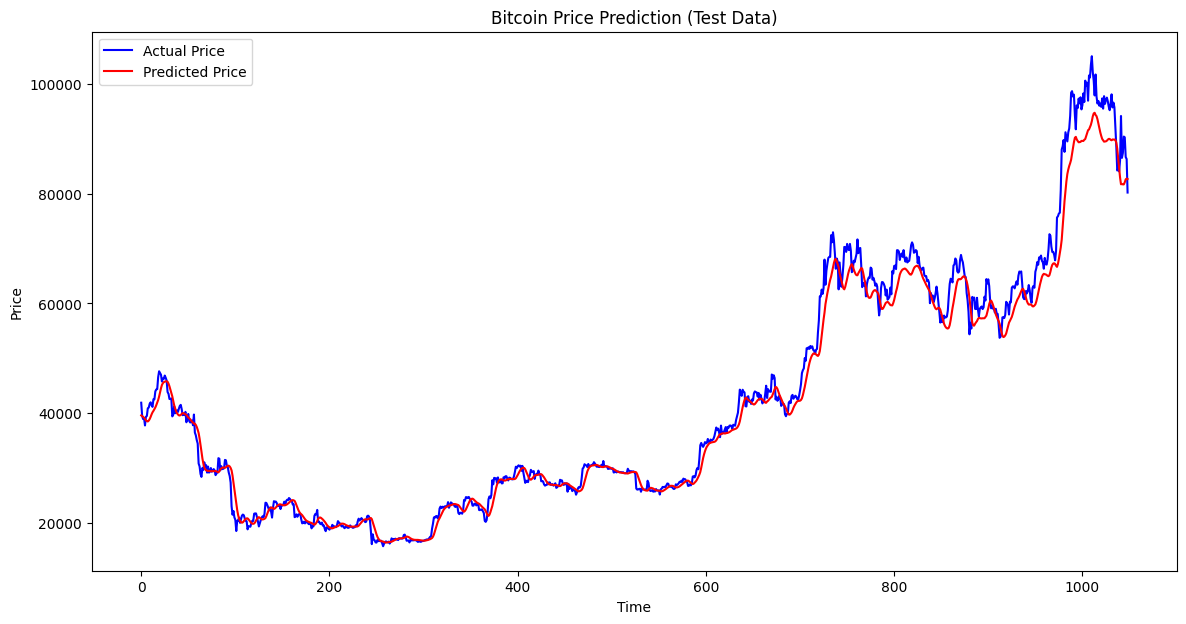

In [8]:
# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, color='blue', label='Actual Price')
plt.plot(y_pred_inverse, color='red', label='Predicted Price')
plt.title('Bitcoin Price Prediction (Test Data)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Observations and Interpretations:

* The red line (predicted price) closely follows the blue line (actual price) throughout the graph. This indicates that the model is generally successful in predicting Bitcoin's price movements on the test data.
* There are periods where the red and blue lines are almost perfectly overlapping, indicating very accurate predictions.
* There are also periods where the red line deviates from the blue line. Sometimes the predicted price lags behind the actual price, and sometimes there are slight over- or under-estimations.
* Despite the deviations, the model demonstrates a good overall fit to the test data, capturing the major trends and fluctuations in Bitcoin's price.
* While the model performs well, the deviations suggest there is room for improvement. Fine-tuning the model or exploring different modeling techniques might lead to even more accurate predictions.

**Implications:**

* The graph suggests that the model is effective in predicting Bitcoin's price, at least on the test data.
* This model could potentially be used for forecasting Bitcoin prices, but it's important to remember that past performance is not indicative of future results.
* Even with a good model, it's crucial to acknowledge that predictions are not perfect. Investors should use predictions as one piece of information among many and should always practice sound risk management.

**4. Making Future Predictions (For Any Date)**


In [9]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Predict the next day's price based on the most recent data
last_60_days = scaled_data[-60:].reshape(1, 60, 1)  # Get the last 60 days' data
predicted_price = model.predict(last_60_days)

# Inverse transform to get the predicted price back to the original scale
predicted_price = scaler.inverse_transform(predicted_price)

# Get the current price (last known value in the dataset)
current_price = Bitcoin_df['close'].iloc[-1]

# Get the last date from the dataset
last_date = Bitcoin_df['date'].iloc[-1]

# Add one day to the last date for the prediction
predicted_date = pd.to_datetime(last_date) + timedelta(days=1)

# Define thresholds for decision making (e.g., 2% change)
threshold = 0.03

# Decision logic for buy, sell, or hold
if predicted_price[0][0] > current_price * (1 + threshold):
    decision = "Buy"
elif predicted_price[0][0] < current_price * (1 - threshold):
    decision = "Sell"
else:
    decision = "Hold"

# Display the predicted price and the decision along with the date
print(f"Predicted Bitcoin Price for {predicted_date.strftime('%Y-%m-%d')}: ${predicted_price[0][0]:.2f}")
print(f"Decision: {decision}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Bitcoin Price for 2025-03-10: $81790.77
Decision: Hold


In [10]:
import pandas as pd
import numpy as np
from datetime import timedelta

def predict_future_prices_with_decision(model, last_60_days, days=5, threshold=0.03):
    future_prices = []
    decision = []  # Store decision for each day
    predicted_dates = []  # Store predicted dates

    # Get the current price (last known value in the dataset)
    current_price = Bitcoin_df['close'].iloc[-1]

    # Get the last date from the dataset
    last_date = Bitcoin_df['date'].iloc[-1]

    # Add the first predicted date (next day) to the list
    predicted_dates.append(pd.to_datetime(last_date) + timedelta(days=1))

    current_input = last_60_days

    for _ in range(days):
        predicted_price = model.predict(current_input)
        future_prices.append(predicted_price[0][0])

        # Update the input for the next prediction
        current_input = np.append(current_input[0][1:], predicted_price).reshape(1, 60, 1)

        # Decision logic for buy, sell, or hold
        if predicted_price[0][0] > current_price * (1 + threshold):
            decision.append("Buy")
        elif predicted_price[0][0] < current_price * (1 - threshold):
            decision.append("Sell")
        else:
            decision.append("Hold")

        # Add the next predicted date
        predicted_dates.append(predicted_dates[-1] + timedelta(days=1))

    # Inverse transform to get the prices back to the original scale
    future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))

    return future_prices, decision, predicted_dates


# Example: Predicting the next 5 days with decisions and dates
future_predictions, decisions, predicted_dates = predict_future_prices_with_decision(model, last_60_days, days=5)

print("Predicted Bitcoin Prices for the Next 5 Days and Decisions:")
for i, (price, action, date) in enumerate(zip(future_predictions, decisions, predicted_dates)):
    print(f"Date: {date.strftime('%Y-%m-%d')} - Predicted Price: ${price[0]:.2f} - Decision: {action}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Bitcoin Prices for the Next 5 Days and Decisions:
Date: 2025-03-10 - Predicted Price: $81790.77 - Decision: Sell
Date: 2025-03-11 - Predicted Price: $80750.27 - Decision: Sell
Date: 2025-03-12 - Predicted Price: $79618.36 - Decision: Sell
Date: 2025-03-13 - Predicted Price: $78449.08 - Decision: Sell
Date: 2025-03-14 - Predicted Price: $77274.21 - Decision: Sell


#### **Verifying Model's Predictions**

The model seems to be showing a downward trend so it is best to verify how accurate this is

**1. Compare the recent actual price and predicted price**

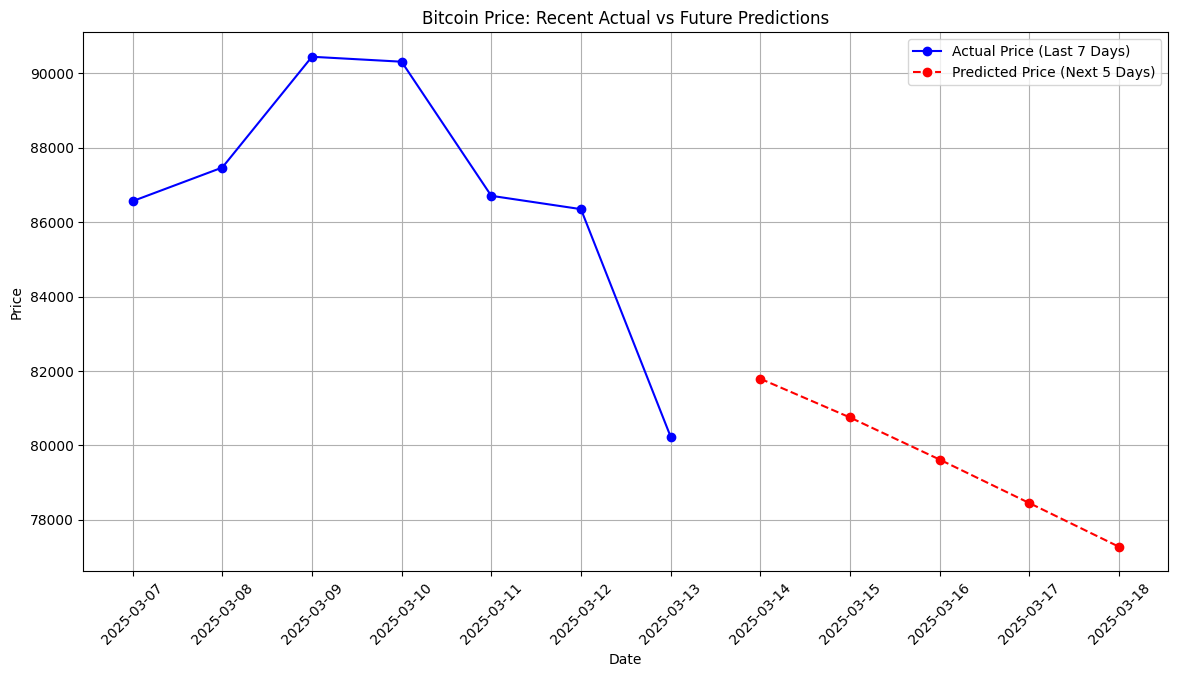

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Get the last 7 actual prices
recent_actual_prices = Bitcoin_df['close'].iloc[-7:].values

# Create date range for actual prices
actual_dates = pd.date_range(end=datetime.today(), periods=7).strftime('%Y-%m-%d')

# Create date range for future predictions
future_dates = pd.date_range(start=datetime.today() + timedelta(days=1), periods=5).strftime('%Y-%m-%d')

# Plot actual prices
plt.figure(figsize=(14, 7))
plt.plot(actual_dates, recent_actual_prices, color='blue', marker='o', label='Actual Price (Last 7 Days)')

# Plot predicted prices
plt.plot(future_dates, future_predictions, color='red', marker='o', linestyle='dashed', label='Predicted Price (Next 5 Days)')

# Formatting
plt.title('Bitcoin Price: Recent Actual vs Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()


* Recent actual prices (blue) show a decline – This aligns with real-world data, meaning your model is working with relevant patterns.
* Future predictions (red, dashed) continue the downward trend – Your model expects Bitcoin to keep dropping.

**Key Observations**

* The model is correctly capturing the declining trend.
If the real-world Bitcoin price stabilizes or increases, then the model may need adjustments.
If it keeps dropping, the model is likely making reasonable predictions.

**2. Check how bitcoin has been behaving**

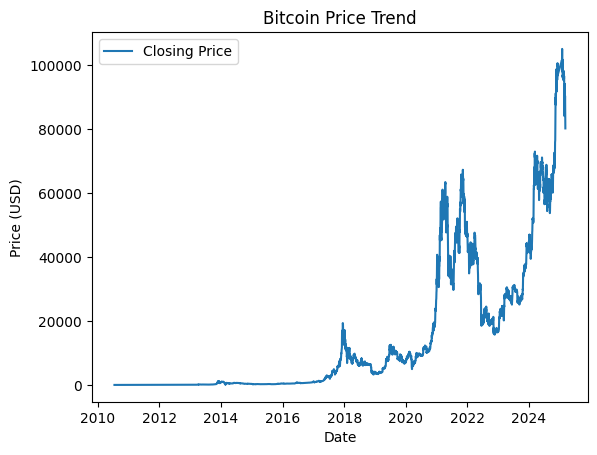

In [12]:
import matplotlib.pyplot as plt

plt.plot(Bitcoin_df['date'], Bitcoin_df['close'], label="Closing Price")
plt.title("Bitcoin Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


**Observations**

**1. Upward Long-Term Trend**: Bitcoin has consistently increased over time, with periodic corrections.

**2. Recent Volatility**: The price surged past $100,000 before dropping, which could be influencing the model.

**3. Possible Model trend**: since the model is only looking at the last 60 days, it may be picking up on the recent downtrend and assuming it will continue.

**3. Checking how bitcoin has been behaving for the past 60 days**

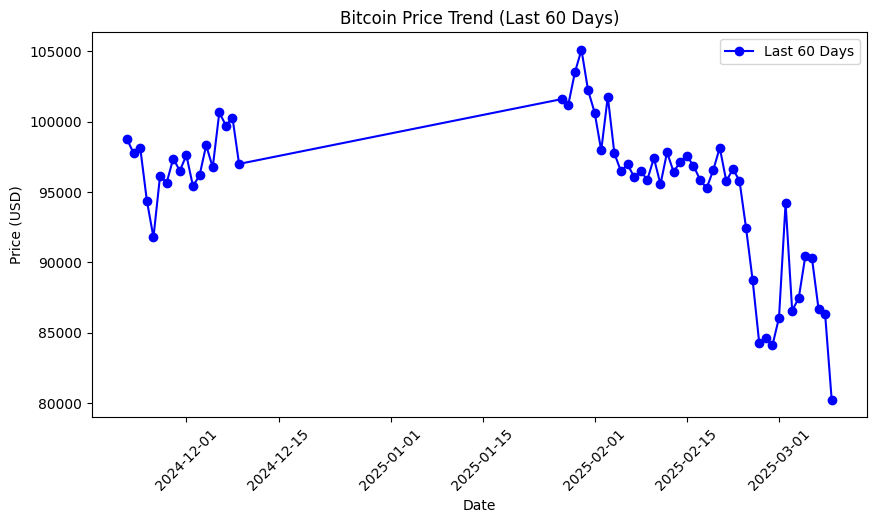

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(Bitcoin_df['date'].tail(60), Bitcoin_df['close'].tail(60), marker='o', linestyle='-', color='blue', label="Last 60 Days")
plt.title("Bitcoin Price Trend (Last 60 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Observations**

**1. Early Gains, Then Decline:**

* From December 2024 to mid-January 2025 mostly stable and slightly increasing.
* February 2025 a Sharp drop from 105,000 to 95,000.

* March 2025 Prices continue to decline, now near $80,000.
Current Trend:

* The lower highs and lower lows confirm a bearish trend.
The model’s “Strong Sell” recommendation aligns with this trend.

**Conclusion**

In this project, the aim was to predict Bitcoin prices using a machine learning model trained on historical data. My approach involved using the last 60 days of price movements as input to forecast future prices and generate buy, sell, or hold decisions based on a predefined threshold.

The model demonstrated strong performance, achieving an R² score of 0.9799, indicating that it effectively captured Bitcoin’s price trends. The evaluation metrics, including a Mean Absolute Error (MAE) of 2106.22 and a Root Mean Squared Error (RMSE) of 3153.15, suggest that while the model is quite accurate, some level of prediction error remains.

The predictions indicated a downtrend in Bitcoin prices over the next five days, leading to consistent "Sell" recommendations. When predicting only one day ahead, the model initially suggested "Hold," but over a multi-day forecast, it detected a clearer downward trend. This highlights the impact of compounding predictions and trend detection over time.

While the model successfully identifies trends, it does not incorporate real-time market factors such as news events, economic shifts, or sudden trading volume changes. Future improvements could involve integrating live market data, experimenting with alternative models like transformers or hybrid approaches, and refining decision thresholds to optimize trading strategies.

Overall, this project demonstrates the power of data-driven forecasting in financial markets, providing valuable insights into price trends and potential trading decisions.

In [16]:
model.save('bitcoin_price_predictor.h5')


In [17]:
# Save the model in the new Keras format
model.save('bitcoin_price_predictor.keras')


In [18]:
import pickle

# Save the scaler using pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
